# Regresion Lineal

## Cargar datos

In [1]:
import seaborn as sns

In [5]:
df =sns.load_dataset(name="car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Seleccion de variables

<AxesSubplot:xlabel='alcohol', ylabel='total'>

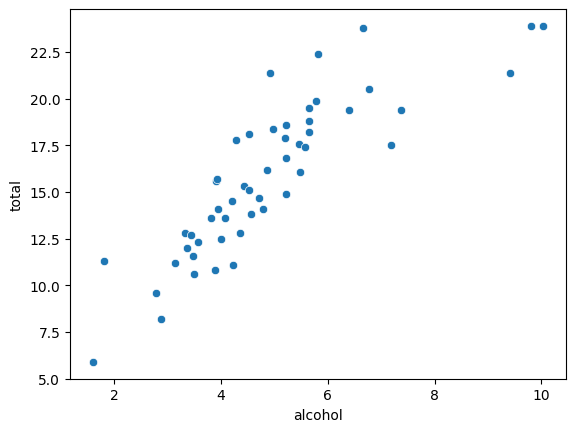

In [7]:

sns.scatterplot(x="alcohol", y="total", data=df)

In [8]:
df.shape

(51, 8)

## Modelo `LinearRegression()`

## Entrenar modelo

In [9]:
explicativas = df[["alcohol"]]

In [11]:
objetivo = df["total"]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
type(model)

sklearn.linear_model._base.LinearRegression

In [15]:
model.fit(X=explicativas, y=objetivo)

LinearRegression()

In [17]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

$$
total = 5.85 + 2.03 \cdot alcohol
$$

Por cada unidad de alcohol que aumente el estado el numero total de accidentes incrementará en 2.03

## Realizar predicciones

In [19]:

model.predict(X=[[2]])

/home/noroot/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.92278876])

In [29]:
y_pred = model.predict(X=df[["alcohol"]])

In [35]:
df.insert(0, "pred", y_pred)

In [36]:
df.head()

,pred,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.321112,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,15.054867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,16.443069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.695093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.686997,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Visualizar Modelo

<AxesSubplot:xlabel='alcohol', ylabel='total'>

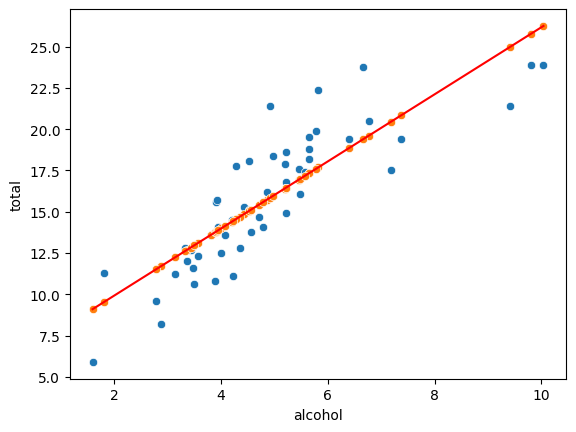

In [41]:
sns.scatterplot(x="alcohol", y="total", data=df)
sns.scatterplot(x="alcohol", y="pred", data=df)
sns.lineplot(x="alcohol", y="pred", data=df, color="red")

## Bondad de ajuste

In [42]:
model.score(X=explicativas, y=objetivo)

0.7269492966665405

Nuestro modelo explica un 72% de la variabilidad original del total de accidentes